# Data Manipulation and Machine Learning Using Pandas - Python
### Abedin Sherifi

Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import zscore

Directory change to current directory <br>
list of files <br>
get current directory

In [2]:
current_dir = os.chdir('/home/dino/Documents/Python_Tutorials/Data Processing/data')

In [3]:
list_files = os.listdir()
print(list_files)

['figure.png', 'dino.pdf', 'Dino_Test.csv', 'auto-mpg-shuffle.csv', 'auto-mpg.csv']


In [4]:
os.getcwd()

'/home/dino/Documents/Python_Tutorials/Data Processing/data'

Reading csv file <br>
showing the first 5 rows of the file and all the columns <br>
info regarding the data file <br>
shape of file, meaning number of rows by number of columns

In [5]:
df = pd.read_csv('auto-mpg.csv')

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
df.shape

(398, 9)

In [9]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). <br>

Text(0, 0.5, 'Origin')

<Figure size 1080x1080 with 0 Axes>

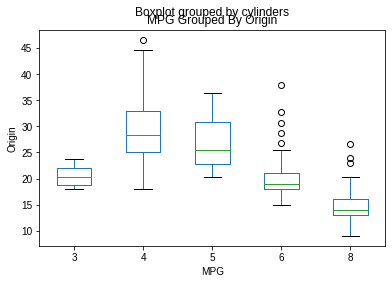

In [10]:
plt.figure(figsize=(15,15))
df.boxplot(by='cylinders', column=['mpg'], grid=False);
plt.style.use('seaborn') #seaborn, default, ggplot
plt.title('MPG Grouped By Origin')
plt.xlabel('MPG')
plt.ylabel('Origin')

A pie plot is a proportional representation of the numerical data in a column. <br>

Text(0, 0.5, 'MPG')

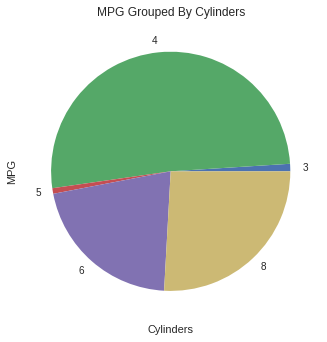

In [11]:
df.groupby('cylinders')["mpg"].count().plot(kind='pie')
plt.title('MPG Grouped By Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('MPG')

A heatmap contains values representing various shades of the same color for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. <br>
The varying intensity of color represents the measure of correlation. <br>

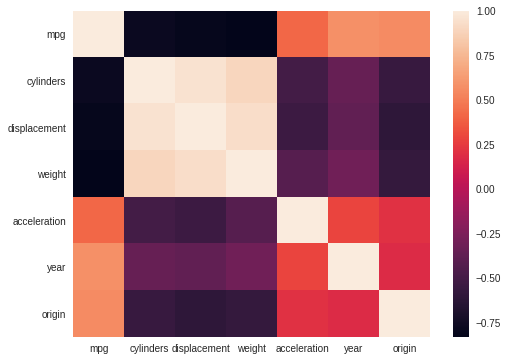

In [12]:
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

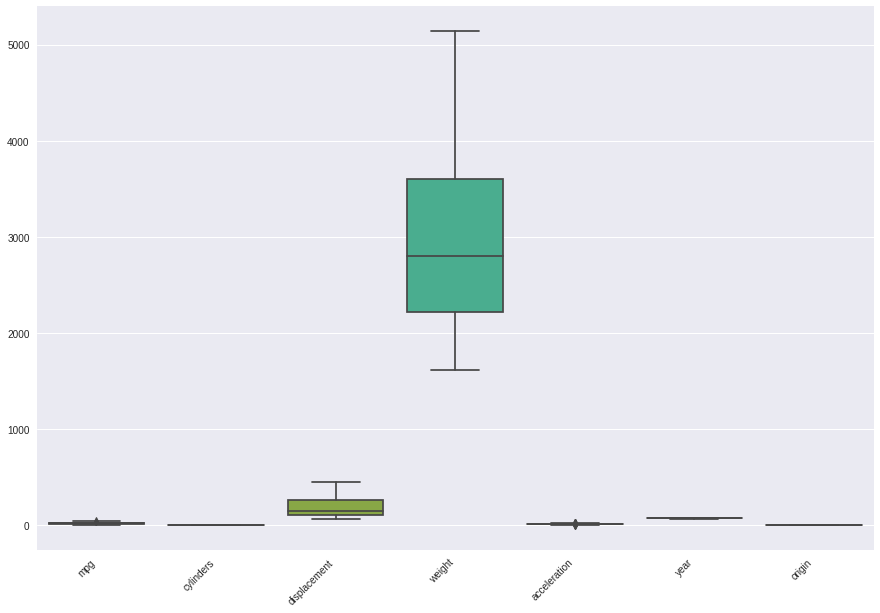

In [13]:
plt.figure(figsize=(15,10))
ax =sns.boxplot(data=df)
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)

In [14]:
df.values

array([[18.0, 8, 307.0, ..., 70, 1, 'chevrolet chevelle malibu'],
       [15.0, 8, 350.0, ..., 70, 1, 'buick skylark 320'],
       [18.0, 8, 318.0, ..., 70, 1, 'plymouth satellite'],
       ...,
       [32.0, 4, 135.0, ..., 82, 1, 'dodge rampage'],
       [28.0, 4, 120.0, ..., 82, 1, 'ford ranger'],
       [31.0, 4, 119.0, ..., 82, 1, 'chevy s-10']], dtype=object)

In [15]:
df.insert(9,'test',(df['mpg']/df['cylinders']).astype(float))

In [16]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name', 'test'],
      dtype='object')

In [17]:
df.index

RangeIndex(start=0, stop=398, step=1)

Sorting a column in ascending order <br>
Indexing a dataframe based on a column threshold <br>
Adding column to dataframe <br>

In [18]:
df.sort_values('cylinders', ascending = False)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,test
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,2.250000
86,14.0,8,304.0,150,3672,11.5,73,1,amc matador,1.750000
230,15.5,8,350.0,170,4165,11.4,77,1,chevrolet monte carlo landau,1.937500
231,15.5,8,400.0,190,4325,12.2,77,1,chrysler cordoba,1.937500
232,16.0,8,351.0,149,4335,14.5,77,1,ford thunderbird,2.000000
...,...,...,...,...,...,...,...,...,...,...
81,28.0,4,97.0,92,2288,17.0,72,3,datsun 510 (sw),7.000000
243,21.5,3,80.0,110,2720,13.5,77,3,mazda rx-4,7.166667
334,23.7,3,70.0,100,2420,12.5,80,3,mazda rx-7 gs,7.900000
71,19.0,3,70.0,97,2330,13.5,72,3,mazda rx2 coupe,6.333333


In [19]:
df['name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

In [20]:
df[df['mpg'] > 20]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,test
14,24.0,4,113.0,95,2372,15.0,70,3,toyota corona mark ii,6.000000
15,22.0,6,198.0,95,2833,15.5,70,1,plymouth duster,3.666667
17,21.0,6,200.0,85,2587,16.0,70,1,ford maverick,3.500000
18,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510,6.750000
19,26.0,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan,6.500000
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,6.750000
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,11.000000
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,8.000000
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,7.000000


In [21]:
df['Dino'] = 2 * df['cylinders']
print(df)

      mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0        130    3504          12.0    70   
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
393  27.0          4         140.0         86    2790          15.6    82   
394  44.0          4          97.0         52    2130          24.6    82   
395  32.0          4         135.0         84    2295          11.6    82   
396  28.0          4         120.0         79    2625          18.6    82   
397  31.0          4         119.0         82    2720          19.4    82   

     origin                       name    test  Dino  
0         1  chevrol

Min of a column <br>
Dropping duplicates on a column <br>

In [22]:
df.mpg.min()

9.0

In [23]:
df['mpg'].cumsum

<bound method NDFrame._add_numeric_operations.<locals>.cumsum of 0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64>

In [24]:
df.drop_duplicates(subset='name')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,test,Dino
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,2.250,16
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,1.875,16
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,2.250,16
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,2.000,16
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,2.125,16
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,6.750,8
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,11.000,8
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,8.000,8
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,7.000,8


 Value counts for a specific column <br>
 Normalized value counts <br>
 Aggregate min,max,sum for specific column <br>

In [25]:
df['name'].value_counts()

ford pinto                  6
amc matador                 5
toyota corolla              5
ford maverick               5
amc gremlin                 4
                           ..
mazda glc custom l          1
mercedes-benz 280s          1
dodge aspen 6               1
chevrolet cavalier wagon    1
mazda glc                   1
Name: name, Length: 305, dtype: int64

In [26]:
df['name'].value_counts(normalize=True)

ford pinto                  0.015075
amc matador                 0.012563
toyota corolla              0.012563
ford maverick               0.012563
amc gremlin                 0.010050
                              ...   
mazda glc custom l          0.002513
mercedes-benz 280s          0.002513
dodge aspen 6               0.002513
chevrolet cavalier wagon    0.002513
mazda glc                   0.002513
Name: name, Length: 305, dtype: float64

In [27]:
df.groupby('name')['mpg'].agg([min, max, sum])

,min,max,sum
name,,,
amc ambassador brougham,13.0,13.0,13.0
amc ambassador dpl,15.0,15.0,15.0
amc ambassador sst,17.0,17.0,17.0
amc concord,19.4,24.3,43.7
amc concord d/l,18.1,18.1,18.1
...,...,...,...
vw dasher (diesel),43.4,43.4,43.4
vw pickup,44.0,44.0,44.0
vw rabbit,29.0,41.5,70.5


Looking up specific values within a column <br>
Dataframe sorting

In [28]:
df[df['name'].isin(['vw rabbit custom', 'amc concord'])]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,test,Dino
257,19.4,6,232.0,90,3210,17.2,78,1,amc concord,3.233333,12
293,31.9,4,89.0,71,1925,14.0,79,2,vw rabbit custom,7.975000,8
315,24.3,4,151.0,90,3003,20.1,80,1,amc concord,6.075000,8


In [29]:
df.sort_index()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,test,Dino
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,2.250,16
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,1.875,16
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,2.250,16
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,2.000,16
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,2.125,16
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,6.750,8
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,11.000,8
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,8.000,8
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,7.000,8


Histogram plot of specific column <br>
Different use of plot styles such as fivethirtyeight, seaborn, default, ggplot <br>
Line plot <br>
Scatter plot <br>

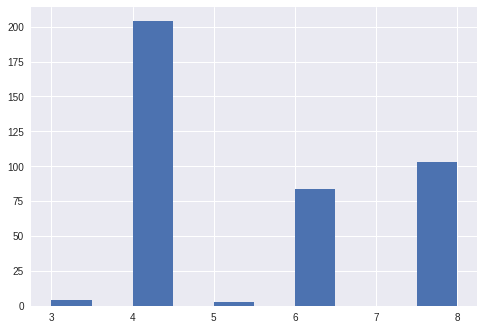

In [30]:
df['cylinders'].hist()
plt.style.use('fivethirtyeight') #seaborn, default, ggplot

<AxesSubplot:xlabel='mpg', ylabel='cylinders'>

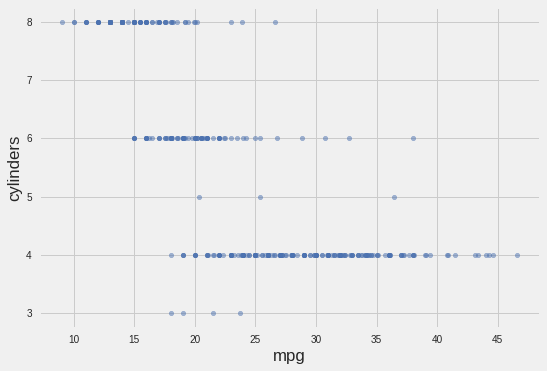

In [31]:
df.plot(x='mpg', y='cylinders', kind='scatter', alpha=0.5)

Any row of any column is na <br>
Dropping na on any row for any column <br>
Filling any na with value 0 <br>

In [32]:
df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
test            False
Dino            False
dtype: bool

In [33]:
df.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,test,Dino
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,2.250,16
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,1.875,16
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,2.250,16
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,2.000,16
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,2.125,16
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,6.750,8
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,11.000,8
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,8.000,8
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,7.000,8


In [34]:
df.fillna(0)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,test,Dino
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,2.250,16
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,1.875,16
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,2.250,16
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,2.000,16
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,2.125,16
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,6.750,8
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,11.000,8
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,8.000,8
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,7.000,8


Dataframe to csv file <br>

In [35]:
df.to_csv('Dino_Test.csv')

In [36]:
for col in df.columns:
    print(col, df[col].nunique(), len(df))
df

mpg 129 398
cylinders 5 398
displacement 82 398
horsepower 94 398
weight 351 398
acceleration 95 398
year 13 398
origin 3 398
name 305 398
test 156 398
Dino 5 398


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,test,Dino
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,2.250,16
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,1.875,16
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,2.250,16
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,2.000,16
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,2.125,16
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,6.750,8
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,11.000,8
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,8.000,8
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,7.000,8


In [37]:
df.drop(['name'], axis=1, inplace=True)

In [38]:
df[['mpg', 'cylinders']].sort_values(by='cylinders').tail(10)

,mpg,cylinders
93,14.0,8
91,13.0,8
89,15.0,8
88,14.0,8
87,13.0,8
86,14.0,8
285,17.0,8
286,17.6,8
92,13.0,8
0,18.0,8


In [39]:
origin_map = {1: 'X', 2: 'Y', 3: 'Z'}
df['origin'].replace(origin_map, inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,test,Dino
0,18.0,8,307.0,130,3504,12.0,70,X,2.250,16
1,15.0,8,350.0,165,3693,11.5,70,X,1.875,16
2,18.0,8,318.0,150,3436,11.0,70,X,2.250,16
3,16.0,8,304.0,150,3433,12.0,70,X,2.000,16
4,17.0,8,302.0,140,3449,10.5,70,X,2.125,16


<AxesSubplot:xlabel='origin'>

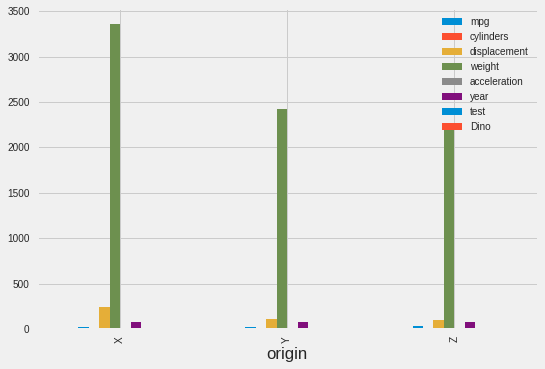

In [40]:
df.groupby('origin').mean().plot(kind='bar')

In [41]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin           object
test            float64
Dino              int64
dtype: object

In [42]:
df['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

7.815984312565782


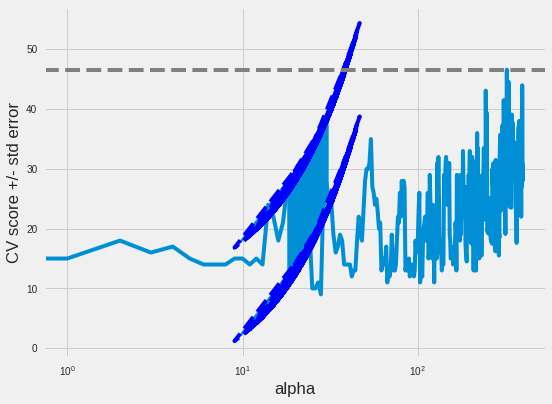

In [43]:
mpg_std = df['mpg'].std()
print(mpg_std)
plt.figure().set_size_inches(8, 6)
plt.semilogx(df['mpg'])

plt.semilogx(df['mpg'], df['mpg'] + mpg_std, 'b--')
plt.semilogx(df['mpg'], df['mpg'] - mpg_std, 'b--')

plt.fill_between(df['mpg'], df['mpg'] + mpg_std, df['mpg'] - mpg_std)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(df['mpg']), linestyle='--', color='.5')

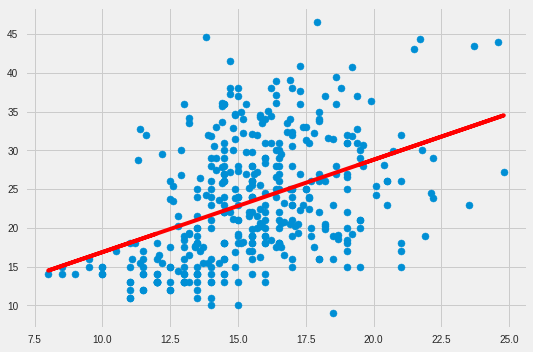

In [44]:
from scipy.stats import linregress

x = df['acceleration']
y = df['mpg']

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m*x + b, color="red")   # I've added a color argument here

plt.savefig("figure.png")

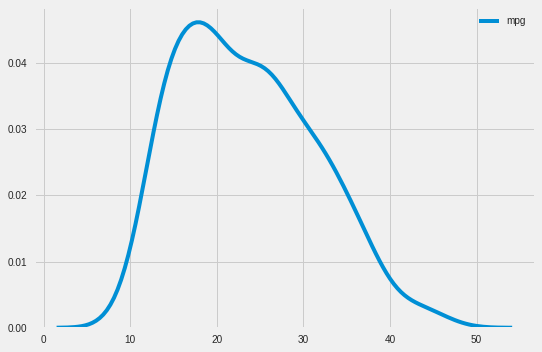

In [45]:
mpgg = df['mpg']
accel = df['acceleration']
sns.kdeplot(data=mpgg)
plt.savefig('dino.pdf')

<AxesSubplot:xlabel='mpg'>

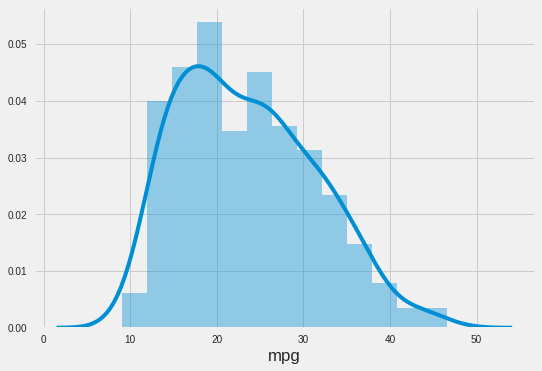

In [46]:
sns.distplot(df['mpg'])

In [47]:
import glob

print(glob.glob('*.csv'))

df_list = []
for file in glob.glob('*.csv'):
    df = pd.read_csv(file)
    df_list.append(df)

df = pd.concat(df_list)
df.shape

['Dino_Test.csv', 'auto-mpg-shuffle.csv', 'auto-mpg.csv']


(1194, 12)

In [48]:
df.iloc[0:5, 0:3]

,Unnamed: 0,mpg,cylinders
0,0.0,18.0,8
1,1.0,15.0,8
2,2.0,18.0,8
3,3.0,16.0,8
4,4.0,17.0,8


In [49]:
df[:1]

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,test,Dino
0,0.0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,2.25,16.0


In [50]:
df[-1:]

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,test,Dino
397,NaN,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10,NaN,NaN


In [51]:
df[df['name'].apply(lambda state: state[0] == 'p')].head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,test,Dino
2,2.0,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,2.250000,16.0
7,7.0,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,1.750000,16.0
8,8.0,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,1.750000,16.0
11,11.0,14.0,8,340.0,160,3609,8.0,70,1,plymouth 'cuda 340,1.750000,16.0
15,15.0,22.0,6,198.0,95,2833,15.5,70,1,plymouth duster,3.666667,12.0


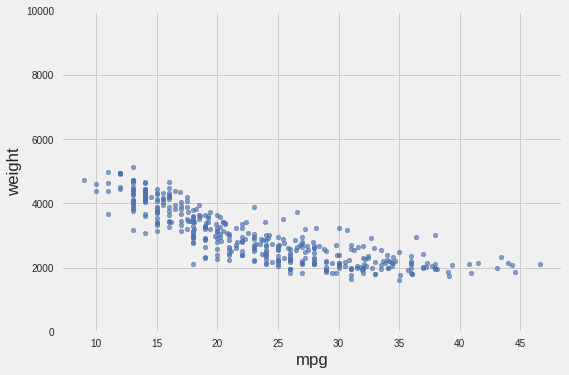

In [52]:
#scatter plot grlivarea/saleprice
var = 'mpg'
data = pd.concat([df['weight'], df[var]], axis=1)
data.plot.scatter(x=var, y='weight', ylim=(0,10000), alpha=0.3);

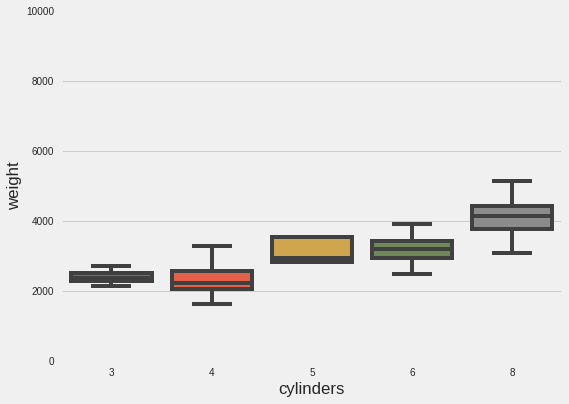

In [53]:
var = 'cylinders'
data = pd.concat([df['weight'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="weight", data=data)
fig.axis(ymin=0, ymax=10000);

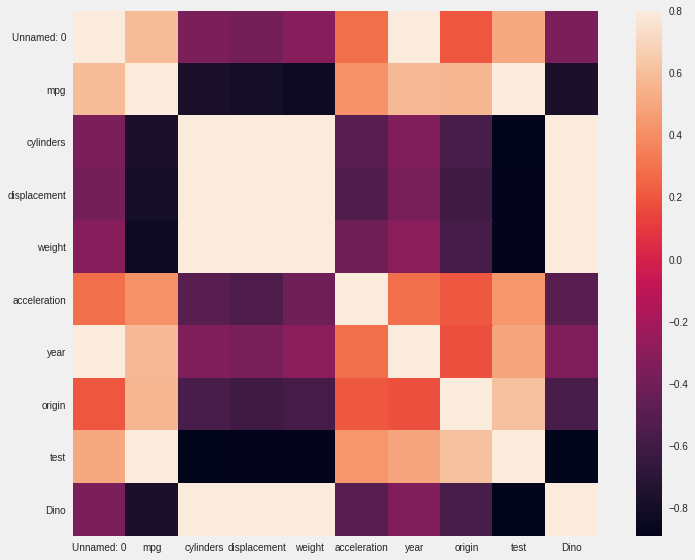

In [54]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

/home/dino/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


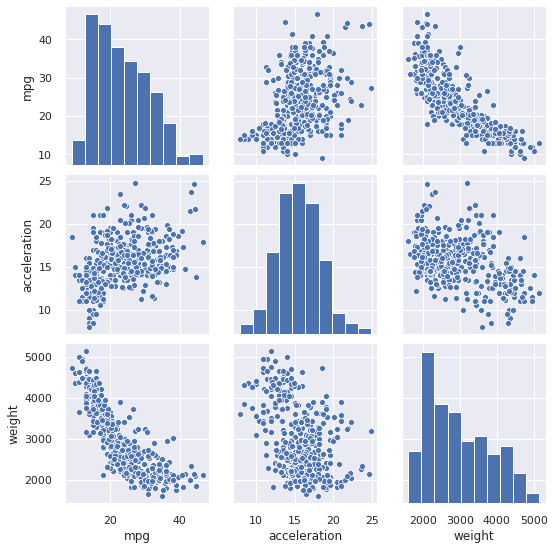

In [55]:
sns.set()
cols = ['mpg', 'acceleration', 'weight']
sns.pairplot(df[cols], size = 2.5)
plt.show();

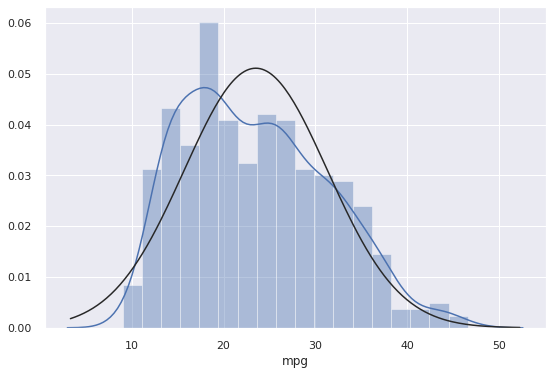

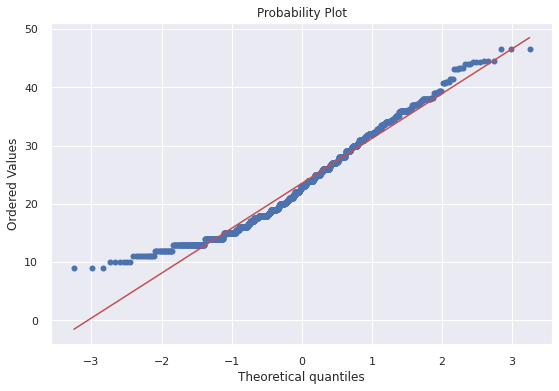

In [56]:
#histogram and normal probability plot
from scipy import stats
sns.distplot(df['mpg'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df['mpg'], plot=plt)

In [57]:
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,test,Dino
0,0.0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,2.250,16.0
1,1.0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,1.875,16.0
2,2.0,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,2.250,16.0
3,3.0,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,2.000,16.0
4,4.0,17.0,8,302.0,140,3449,10.5,70,1,ford torino,2.125,16.0


In [58]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to a single dummy variable.  The new columns (which do not replace the old) will have a 1
# at every location where the original column (name) matches each of the target_values.  One column is added for
# each target value.
def encode_text_single_dummy(df, name, target_values):
    for tv in target_values:
        l = list(df[name].astype(str))
        l = [1 if str(x) == str(tv) else 0 for x in l]
        name2 = "{}-{}".format(name, tv)
        df[name2] = l


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.  Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return pd.DataFrame(df,columns=result).to_numpy(dtype=np.float32), dummies.to_numpy(dtype=np.float32)
    else:
        # Regression
        return pd.DataFrame(df,columns=result).to_numpy(dtype=np.float32), pd.DataFrame(df,columns=[target]).to_numpy(dtype=np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low

In [59]:
os.getcwd()

'/home/dino/Documents/Python_Tutorials/Data Processing/data'

In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input. <br>

The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance. <br>

In [60]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from keras.layers import Dropout

filename_read = "auto-mpg.csv"
df = pd.read_csv(filename_read,na_values=['NA','?'])
print(df.head())

cars = df['name']
df.drop('name',1,inplace=True)
missing_median(df, 'horsepower')
x,y = to_xy(df,"mpg")
model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Using TensorFlow backend.
/home/dino/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dino/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dino/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dino/anaconda3/lib/python3.7/site-packages/tensorflow/py

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  






/home/dino/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dino/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dino/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dino/anaconda3/lib/python3.7/site-packages/tensorboard/compat



Epoch 1/100
 - 0s - loss: 1553.9449
Epoch 2/100
 - 0s - loss: 498.9087
Epoch 3/100
 - 0s - loss: 390.9675
Epoch 4/100
 - 0s - loss: 279.5224
Epoch 5/100
 - 0s - loss: 211.2098
Epoch 6/100
 - 0s - loss: 182.6571
Epoch 7/100
 - 0s - loss: 153.6962
Epoch 8/100
 - 0s - loss: 125.4851
Epoch 9/100
 - 0s - loss: 104.6826
Epoch 10/100
 - 0s - loss: 80.7411
Epoch 11/100
 - 0s - loss: 68.2001
Epoch 12/100
 - 0s - loss: 58.0493
Epoch 13/100
 - 0s - loss: 49.7571
Epoch 14/100
 - 0s - loss: 38.0418
Epoch 15/100
 - 0s - loss: 36.6317
Epoch 16/100
 - 0s - loss: 29.4722
Epoch 17/100
 - 0s - loss: 31.1366
Epoch 18/100
 - 0s - loss: 25.9202
Epoch 19/100
 - 0s - loss: 25.3872
Epoch 20/100
 - 0s - loss: 23.2401
Epoch 21/100
 - 0s - loss: 21.9796
Epoch 22/100
 - 0s - loss: 21.9286
Epoch 23/100
 - 0s - loss: 20.6222
Epoch 24/100
 - 0s - loss: 20.6905
Epoch 25/100
 - 0s - loss: 20.6182
Epoch 26/100
 - 0s - loss: 21.9702
Epoch 27/100
 - 0s - loss: 21.7486
Epoch 28/100
 - 0s - loss: 18.9437
Epoch 29/100
 - 0

In [61]:
pred = model.predict(x)
print("Shape: {}".format(pred.shape))
print(pred)

Shape: (398, 1)
[[15.265084 ]
 [14.315575 ]
 [15.7501745]
 [16.1137   ]
 [15.271221 ]
 [ 9.591824 ]
 [ 9.530954 ]
 [ 9.54981  ]
 [ 9.451338 ]
 [12.510649 ]
 [14.887501 ]
 [13.544702 ]
 [12.929207 ]
 [20.21975  ]
 [24.87873  ]
 [20.63375  ]
 [21.111378 ]
 [22.51144  ]
 [26.364058 ]
 [29.471281 ]
 [22.755383 ]
 [23.501257 ]
 [25.102707 ]
 [24.631548 ]
 [21.759888 ]
 [ 9.141951 ]
 [10.9527855]
 [10.535353 ]
 [ 9.458532 ]
 [26.830149 ]
 [24.995363 ]
 [26.055431 ]
 [27.89841  ]
 [21.820961 ]
 [16.765759 ]
 [17.566284 ]
 [17.576164 ]
 [17.83523  ]
 [11.090075 ]
 [ 9.257837 ]
 [11.869749 ]
 [11.999786 ]
 [ 5.611812 ]
 [ 7.2441764]
 [ 4.3638854]
 [19.759449 ]
 [24.923788 ]
 [17.733776 ]
 [18.429575 ]
 [24.665451 ]
 [26.108082 ]
 [28.116987 ]
 [26.443535 ]
 [30.75767  ]
 [31.655014 ]
 [29.61293  ]
 [28.746172 ]
 [26.702988 ]
 [26.802368 ]
 [28.498001 ]
 [25.865143 ]
 [26.015015 ]
 [11.067772 ]
 [10.5033245]
 [12.358601 ]
 [12.33798  ]
 [15.064381 ]
 [ 8.862091 ]
 [ 9.750837 ]
 [10.17697  ]
 [10

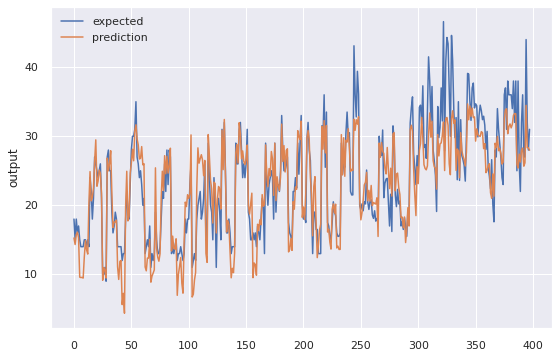

In [62]:
chart_regression(pred.flatten(),y, sort=False)

Root Mean Square Error is the square root of the average of the squared differences between the estimated and the actual value of the variable/feature. <br>

In [63]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 3.590421438217163


In [64]:
# Sample predictions
for i in range(10):
    print("{}. Car name: {}, MPG: {}, predicted MPG: {}".format(i+1,cars[i],y[i],pred[i]))

1. Car name: chevrolet chevelle malibu, MPG: [18.], predicted MPG: [15.265084]
2. Car name: buick skylark 320, MPG: [15.], predicted MPG: [14.315575]
3. Car name: plymouth satellite, MPG: [18.], predicted MPG: [15.7501745]
4. Car name: amc rebel sst, MPG: [16.], predicted MPG: [16.1137]
5. Car name: ford torino, MPG: [17.], predicted MPG: [15.271221]
6. Car name: ford galaxie 500, MPG: [15.], predicted MPG: [9.591824]
7. Car name: chevrolet impala, MPG: [14.], predicted MPG: [9.530954]
8. Car name: plymouth fury iii, MPG: [14.], predicted MPG: [9.54981]
9. Car name: pontiac catalina, MPG: [14.], predicted MPG: [9.451338]
10. Car name: amc ambassador dpl, MPG: [15.], predicted MPG: [12.510649]
